In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
 df = pd.read_csv('dispense_hdfc.csv')

In [ ]:
df

,ds,y
0,12/1/2019,7.89
1,12/2/2019,6.40
2,12/3/2019,6.89
3,12/4/2019,5.91
4,12/5/2019,5.40
...,...,...
670,10/1/2021,18.18
671,10/2/2021,20.73
672,10/3/2021,15.12
673,10/4/2021,15.89


In [ ]:
df['ds'] =  pd.to_datetime(df['ds'], infer_datetime_format=True)
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model =m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
## Foracast away
future = m.make_future_dataframe(periods=200,freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-01,7.447885,1.782579,9.221577,7.447885,7.447885,-2.059081,-2.059081,-2.059081,-1.726408,-1.726408,-1.726408,-0.332672,-0.332672,-0.332672,0.0,0.0,0.0,5.388804
1,2019-12-02,7.450221,0.908655,8.909943,7.450221,7.450221,-2.569463,-2.569463,-2.569463,-1.726408,-1.726408,-1.726408,-0.843054,-0.843054,-0.843054,0.0,0.0,0.0,4.880758
2,2019-12-03,7.452558,2.005866,10.005665,7.452558,7.452558,-1.556255,-1.556255,-1.556255,-1.726408,-1.726408,-1.726408,0.170153,0.170153,0.170153,0.0,0.0,0.0,5.896302
3,2019-12-04,7.454894,1.947542,9.730239,7.454894,7.454894,-1.568956,-1.568956,-1.568956,-1.726408,-1.726408,-1.726408,0.157452,0.157452,0.157452,0.0,0.0,0.0,5.885937
4,2019-12-05,7.457230,1.490798,9.503184,7.457230,7.457230,-1.867945,-1.867945,-1.867945,-1.726408,-1.726408,-1.726408,-0.141537,-0.141537,-0.141537,0.0,0.0,0.0,5.589285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2022-04-19,13.567746,7.708252,16.488241,11.763782,15.699367,-1.556255,-1.556255,-1.556255,-1.726408,-1.726408,-1.726408,0.170153,0.170153,0.170153,0.0,0.0,0.0,12.011491
871,2022-04-20,13.570136,7.780478,16.618288,11.753737,15.721757,-1.568956,-1.568956,-1.568956,-1.726408,-1.726408,-1.726408,0.157452,0.157452,0.157452,0.0,0.0,0.0,12.001179
872,2022-04-21,13.572526,7.333307,16.156886,11.743692,15.744146,-1.867945,-1.867945,-1.867945,-1.726408,-1.726408,-1.726408,-0.141537,-0.141537,-0.141537,0.0,0.0,0.0,11.704580
873,2022-04-22,13.574915,7.704582,16.353375,11.733646,15.762696,-1.494498,-1.494498,-1.494498,-1.726408,-1.726408,-1.726408,0.231910,0.231910,0.231910,0.0,0.0,0.0,12.080417


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2019-12-01,5.388804
1,2019-12-02,4.880758
2,2019-12-03,5.896302
3,2019-12-04,5.885937
4,2019-12-05,5.589285
...,...,...
870,2022-04-19,12.011491
871,2022-04-20,12.001179
872,2022-04-21,11.704580
873,2022-04-22,12.080417


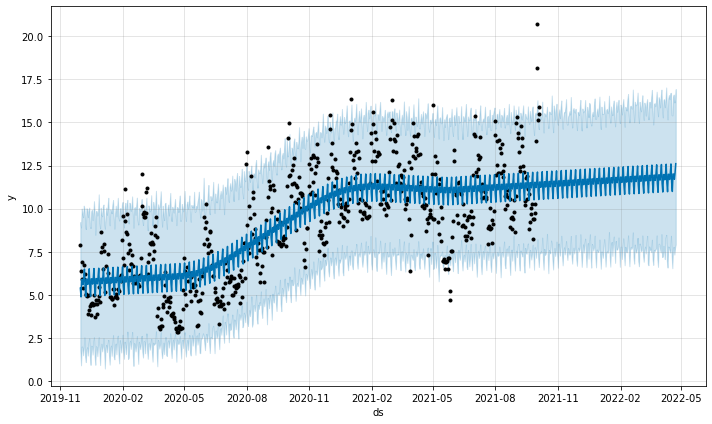

In [ ]:
plot1 = m.plot(forecast)

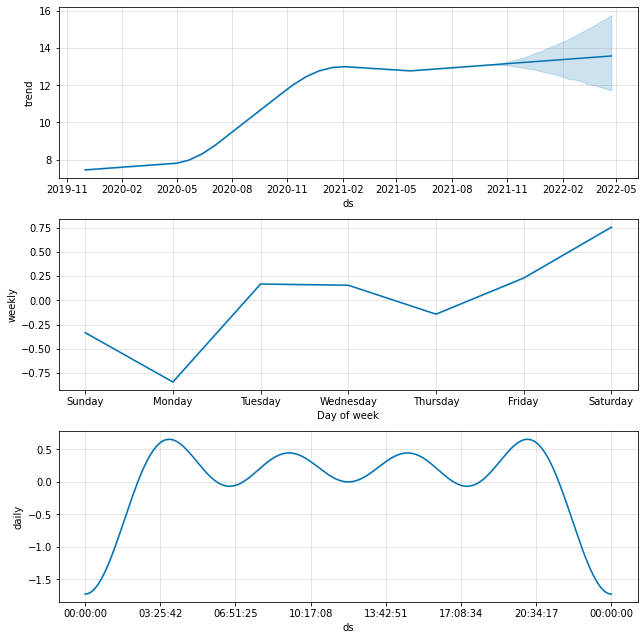

In [ ]:
plot2 = m.plot_components(forecast)

In [ ]:
forecast.to_csv('forecast_hdfc.csv')